<a href="https://colab.research.google.com/github/thanhnguyen2612/diveintocode-ml/blob/master/ML_Sprint17_FasterRNN_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Faster R-CNN and YOLO v3

# [Problem 1] Learning and Estimation

## Setup working directory

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
mkdir .kaggle

In [4]:
import json

token = {
    "username":"thanhnguyen2612",
    "key":"7c4660ab16f43d322769cb90d8c1d8d5"
}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [5]:
mkdir /root/.kaggle

In [6]:
!cp -R /content/.kaggle/kaggle.json /root/.kaggle

## Download datasets

In [1]:
import os
os.chdir('/content/drive/My Drive')
print(os.getcwd())

/content/drive/My Drive


In [9]:
!kaggle datasets download -d alexattia/the-simpsons-characters-dataset --force

 99% 1.07G/1.08G [00:25<00:00, 63.0MB/s]
100% 1.08G/1.08G [00:25<00:00, 45.6MB/s]


In [10]:
!unzip /content/drive/'My Drive'/the-simpsons-characters-dataset.zip -d Simpsons

Streaming output truncated to the last 5000 lines.
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1271.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1272.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1273.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1274.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1275.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1276.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1277.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1278.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1279.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1280.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1281.jpg  
  inflating: Simpsons/simpsons_datas

## Install model from Github repo

In [11]:
!git clone https://github.com/duckrabbits/ObjectDetection.git

Cloning into 'ObjectDetection'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 49 (delta 4), reused 9 (delta 2), pack-reused 28
Unpacking objects: 100% (49/49), done.


In [12]:
mv Simpsons/simpsons_dataset ObjectDetection

In [2]:
os.chdir('/content/drive/My Drive/ObjectDetection')

In [3]:
ls

annotation.txt  out.csv     README.md  simpsons_dataset/
model/          predict.py  save/      train.py


In [16]:
!pip install keras==2.2.4
!pip install tensorflow==1.15
!pip install Keras-Applications==1.0.7

     |████████████████████████████████| 312 kB 2.8 MB/s 
     |████████████████████████████████| 50 kB 6.6 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.6.0
    Uninstalling keras-2.6.0:
      Successfully uninstalled keras-2.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires keras~=2.6, but you have keras 2.2.4 which is incompatible.
     |████████████████████████████████| 412.3 MB 9.8 kB/s 
     |████████████████████████████████| 3.8 MB 26.7 MB/s 
     |████████████████████████████████| 503 kB 47.8 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=900b35769ee97c985cde546f8b8141a1425e5d3ed50793ebed32720a759ea1fd
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: ten

     |████████████████████████████████| 51 kB 428 kB/s 
  Attempting uninstall: Keras-Applications
    Found existing installation: Keras-Applications 1.0.8
    Uninstalling Keras-Applications-1.0.8:
      Successfully uninstalled Keras-Applications-1.0.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 1.15.0 requires keras-applications>=1.0.8, but you have keras-applications 1.0.7 which is incompatible.
kapre 0.3.5 requires tensorflow>=2.0.0, but you have tensorflow 1.15.0 which is incompatible.


## Run it

In [7]:
!python train.py -p annotation.txt

Using TensorFlow backend.
Parsing annotation files
Training images per class (19 classes) :
{'abraham_grampa_simpson': 687,
 'apu_nahasapeemapetilon': 206,
 'bart_simpson': 650,
 'bg': 0,
 'charles_montgomery_burns': 650,
 'chief_wiggum': 209,
 'comic_book_guy': 208,
 'edna_krabappel': 212,
 'homer_simpson': 718,
 'kent_brockman': 213,
 'krusty_the_clown': 429,
 'lisa_simpson': 756,
 'marge_simpson': 629,
 'milhouse_van_houten': 210,
 'moe_szyslak': 403,
 'ned_flanders': 675,
 'nelson_muntz': 219,
 'principal_skinner': 614,
 'sideshow_bob': 201}
-------------------------------
path to config file : ./save/train_20211023-032538_config.pickle
-------------------------------









Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLaye

In [8]:
import tensorflow.compat.v1 as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [9]:
!pip install 'h5py==2.10.0' --force-reinstall

     |████████████████████████████████| 2.9 MB 4.2 MB/s 
     |████████████████████████████████| 15.7 MB 57 kB/s 
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 1.15.0 requires keras-applications>=1.0.8, but you have keras-applications 1.0.7 which is incompatible.
tensorflow-probability 0.14.1 requires gast>=0.3.2, but you have gast 0.2.2 which is incompatible.
kapre 0.3.5 requires tensorflow>=2.0.0, but you have tensor

In [7]:
!python predict.py -i /content/drive/'My Drive'/Simpsons/kaggle_simpson_testset/kaggle_simpson_testset -c ./save/train_20211023-032538_config.pickle

Using TensorFlow backend.










2021-10-23 05:58:13.586812: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2021-10-23 05:58:13.592410: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2199995000 Hz
2021-10-23 05:58:13.592876: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55a958069d40 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-10-23 05:58:13.592922: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-10-23 05:58:13.595504: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-10-23 05:58:13.609320: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-10-23 05:58:13.609385: I tensorflow/stream_ex

# [Problem 2] Code reading

1. RPN is implemented in **resnet.py**:

    `def rpn(base_layers,num_anchors)`
2. RoI pooling layer is implemented in **RoiPoolingConv.py**:

    `class RoiPoolingConv(Layer)`
3. Loss functions are defined in **losses.py**:

```
    def rpn_loss_regr(num_anchors)
    def rpn_loss_cls(num_anchors)
    def class_loss_regr(num_classes)
    def class_loss_cls(y_true, y_pred)
```

# [Problem 3] Estimation by learned weights

In [8]:
os.chdir('/content/drive/My Drive')

In [9]:
!git clone https://github.com/qqwweee/keras-yolo3.git

Cloning into 'keras-yolo3'...
remote: Enumerating objects: 144, done.
remote: Total 144 (delta 0), reused 0 (delta 0), pack-reused 144
Receiving objects: 100% (144/144), 151.08 KiB | 412.00 KiB/s, done.
Resolving deltas: 100% (65/65), done.


In [10]:
cd keras-yolo3

/content/drive/My Drive/keras-yolo3


In [11]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2021-10-23 06:01:29--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  22.5MB/s    in 12s     

2021-10-23 06:01:41 (20.1 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [12]:
!python convert.py yolov3.cfg yolov3.weights model_data/yolo.h5

Using TensorFlow backend.
Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.


Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)




2021-10-23 06:01:52.617685: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2021-10-23 06:01:52.623785: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2199995000 Hz
2021-10-23 06:01:52.624181: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55b24ad46a00 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-10-23 06:01:52.624227: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-10-23 06:01:52.626724: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-10-23 06:01:52.639266: E tenso

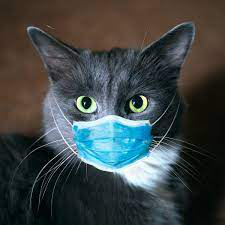

In [13]:
from PIL import Image
img = Image.open('/content/cat.jpeg', 'r')
img

In [14]:
!python yolo_video.py --image

Using TensorFlow backend.
Image detection mode
 Ignoring remaining command line arguments: ./path2your_video,



2021-10-23 06:05:00.596753: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2021-10-23 06:05:00.602428: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2199995000 Hz
2021-10-23 06:05:00.602711: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x562613e0ca00 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-10-23 06:05:00.602751: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-10-23 06:05:00.604954: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-10-23 06:05:00.618157: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-

# [Problem 4] Create a file for learning

In [15]:
import pandas as pd

annotation_df = pd.read_csv('/content/drive/My Drive/ObjectDetection/annotation.txt', header=None)
n_sample, n_col = annotation_df.shape
print(n_sample, n_col)
annotation_df.head()

7889 6


,0,1,2,3,4,5
0,simpsons_dataset/abraham_grampa_simpson/pic_00...,57,72,52,72,abraham_grampa_simpson
1,simpsons_dataset/abraham_grampa_simpson/pic_00...,80,31,337,354,abraham_grampa_simpson
2,simpsons_dataset/abraham_grampa_simpson/pic_00...,128,48,285,407,abraham_grampa_simpson
3,simpsons_dataset/abraham_grampa_simpson/pic_00...,72,126,158,275,abraham_grampa_simpson
4,simpsons_dataset/abraham_grampa_simpson/pic_00...,123,61,294,416,abraham_grampa_simpson


In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
annotation_df.iloc[:, 5] = le.fit_transform(annotation_df.iloc[:, 5])
annotation_df.head()

,0,1,2,3,4,5
0,simpsons_dataset/abraham_grampa_simpson/pic_00...,57,72,52,72,0
1,simpsons_dataset/abraham_grampa_simpson/pic_00...,80,31,337,354,0
2,simpsons_dataset/abraham_grampa_simpson/pic_00...,128,48,285,407,0
3,simpsons_dataset/abraham_grampa_simpson/pic_00...,72,126,158,275,0
4,simpsons_dataset/abraham_grampa_simpson/pic_00...,123,61,294,416,0


In [29]:
path = '/content/drive/My Drive/ObjectDetection/annotation.txt'
out_path = 'train.txt'

with open(path, 'r') as f:
    lines = f.readline()

    for i in range(n_sample):
        split_line = lines.split(',')
        image_path = split_line[0]
        split_line[0] = './' + image_path
        split_line[-1] = str(annotation_df.iloc[i, 5]) + '\n'

        with open(out_path, mode='a') as out_f:
            out_line = ','.join(split_line)
            out_line = out_line.replace('.jpg,', '.jpg ')
            out_f.write(out_line)

# [Problem 5] Confirmation that learning can be done

In [20]:
cp -R /content/drive/'My Drive'/ObjectDetection/simpsons_dataset/ ./

In [21]:
!python convert.py -w yolov3.cfg yolov3.weights  model_data/yolo_weights.h5

Using TensorFlow backend.
Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.


Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)




2021-10-23 06:29:20.534310: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2021-10-23 06:29:20.540192: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2199995000 Hz
2021-10-23 06:29:20.540448: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55b2804e4bc0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-10-23 06:29:20.540489: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-10-23 06:29:20.543832: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-10-23 06:29:20.558514: E tenso

In [ ]:
!python train.py

Using TensorFlow backend.








2021-10-23 06:44:27.868106: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2021-10-23 06:44:27.874283: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2199995000 Hz
2021-10-23 06:44:27.874753: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55cbaf7eebc0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-10-23 06:44:27.874898: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-10-23 06:44:27.877630: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-10-23 06:44:27.894008: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-10-23 06:44:27.894085: I tensorflow/stream_exec